### Tensorflow Tutorial

Welcome! This interactive tensorflow tutorial is meant to combine existing tensorflow tutorials to go through some basics of using this graphical library for the purposes of machine learning. 

As of now this contains my runthrough of the google tensorflow tutorial. The original can be found at:

https://developers.google.com/machine-learning/crash-course/

For helpful tidbits about Jupyter notebooks themselves check out:

https://www.youtube.com/watch?v=HW29067qVWk

For helpful latex symbol references see:

 http://cs.brown.edu/about/system/managed/latex/doc/symbols.pdf

## Table of Contents
<a href='#Basics'>Basics</a>

still to be done 


<a id='Basics'></a>

## What is Machine Learning

We spend lots of time trying to come up with answers to a whole slew of questions, often coming up with a solution then seeing if we can find a better one. What if we could write a code that would do that for us? We can! And that's what machine learning boils down to. In this tutorial we will use tensorflow, as well as some other code libraries to create iterative codes that find good solutions to problems (including, hopefully, some hard ones). We'll talk about what makes a solution good and what makes a problem hard. 


### The framework 

There are different types of problems that can be tackled, often that require different methods and arise from differences in available data. Here, at least at first, we'll focus on something called "Supervised Machine Learning." This means for every data point I have (or example) I not only have the <b><i>features</i></b> associated with that <b><i>example</i></b>, but also a <b><i>label</i></b>. I will then build a <b><i>model</i></b> trained on several of these examples that, when trained, can take in a new feature set and give me a reasonable guess about what the label for that might be.




<b><i>Model</i></b> - defines relationship between feature & estimate of label

<b><i>Example</i></b> - instance of data, both features and labels

$$
(\vec{x}, y)
$$

<b><i>Feature</i></b> - a bit of data about the object, combined into a feature vector

$$
\vec{x} = x_1 + x_2 + ... + x_n
$$

<b><i>Label</i></b> - The true value for the informaiton about the object that one is going to model

$$
y
$$


Say I want to predict height, so I get a bunch of data from a big group of people. I record the height of both their parents, their weight, and whether or not they can dunk on a regulation height basketball hoop. These are all features that may be useful for my model. I also record their true height. That is the label in this case. Since we're predicting how tall they will be, which is predicting a continuous value, this is a <b><i>regression</i></b> problem. Machine learning can also be used to solve <b><i>classification</i></b> problems (for example are they taller or shorter than 6 feet).

<b><i>Regression</i></b> - predict continous values

<b><i>Classification</i></b> - predict category memborship

### Linear Regression - an example

You might remember linear regression from stats. Linear regression is a way to estimate the value of a label from features. Each feature is multiplied by a corresponding weight (or slope term as described in many statistics textbooks). There is an additional term corresponding to a bias term (or an intercept term as it is often described in statistics. Our model thus will look something like the following:

$$
\hat{y} = \vec{w}•\vec{x}+b
$$

Say we have some data, namely a bunch of examples containing a single feature for each example and a corresponding label. Data such as the data below, where we want to estimate a measure of Income for a given area via median house value for that same area.

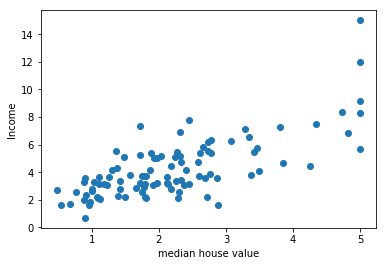

In [54]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 100000.0

x = california_housing_dataframe.median_house_value
y = california_housing_dataframe.median_income
#z = california_housing_dataframe.population

num_examples = 100

plt.scatter(x[0:num_examples-1], y[0:num_examples-1])
plt.xlabel('median house value') #confused about the units here
plt.ylabel('Income')
plt.show()

We see here a scatter plot showing a bunch of examples. We could make a guess ourselves at what the intercept and slope value should be. Feel free to change the $w_1$ and b values around in the code below

$$
\hat{y} = w_1•x_1+b
$$


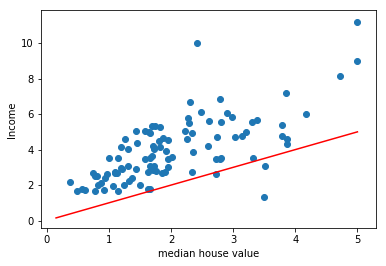

In [53]:
w_1 = 1
b = 0


regressX_0 = min(x)
regressX_1 = max(x)

regressY_0 = w_1*regressX_0 + b
regressY_1 = w_1*regressX_1 + b

plt.plot([regressX_0, regressX_1], [regressY_0, regressY_1], c='r')
plt.scatter(x[0:num_examples-1], y[0:num_examples-1])
plt.xlabel('median house value') #confused about the units here, I basically normalized em beteen 1 and 10 but I don't know what they were originally
plt.ylabel('Income')
plt.show()

Our label guesses ($\hat{y}$) now fall on that line. With a given x value, or feature, we can make a guess about our label value. A new question arises... how good are our guesses? In order to measure this we need to compare our estimated label value ($\hat{y}$) with the true label value (y). Functions that make this comparison are called <b><i>loss</i></b> functions.

<b><i>Loss</i></b> - A comparison between a label value predicted by a model and the true label value

You may recall from statistics that when preforming a linear regression we would try to minimize something called the Mean Square Error

$$
MSE = \sum
$$